In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
%matplotlib inline

In [7]:
#df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_gcfp.txt',sep='\t')
df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.csv')
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag
0,R49#02,1.983017,2.176121,5.882121,1.738615,1.790831,3.950600,1.065420,1.938904,2.021073,12.455842,1.077889,1.784387,Pos - Late
1,R49#03,0.999950,2.920710,0.824318,8.279458,5.255024,3.925302,2.137922,9.256009,2.859532,9.868273,1.632559,1.639504,Pos - Late
2,R49#04,1.303573,2.653693,1.484388,11.072503,2.456271,9.749722,1.851222,3.669641,3.945022,11.615196,2.025580,1.568635,Pos - Late
3,R49#11,0.951188,1.917436,1.394031,1.197008,1.415143,2.359241,1.012177,1.321336,1.372410,4.370095,0.999341,1.308891,Pos - Early Conv
4,R49#12,1.117383,2.436597,2.284072,1.397075,1.373926,1.932654,1.233269,1.517965,1.648289,10.357989,1.230867,1.622813,Pos - Early Conv


In [8]:
df['Diag'].value_counts()

Neg                  30
Pos - Early Conv     12
Pos - Early Acute    12
Pos - Late           10
Name: Diag, dtype: int64

In [9]:
df.columns

Index(['ID', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58',
       'P66', 'VlsE', 'ErpL', 'OspD', 'Diag'],
      dtype='object')

In [10]:
#dummy_variable_1 = pd.get_dummies(df["Diag"])
#dummy_variable_1.head()

In [11]:
#df = pd.concat([df,dummy_variable_1], axis=1)
#df.drop("Diag",axis = 1,inplace=True)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      64 non-null     object 
 1   P100    64 non-null     float64
 2   P41     64 non-null     float64
 3   OspC    64 non-null     float64
 4   DbpA    64 non-null     float64
 5   BmpA    64 non-null     float64
 6   DbpB    64 non-null     float64
 7   P45     64 non-null     float64
 8   P58     64 non-null     float64
 9   P66     64 non-null     float64
 10  VlsE    64 non-null     float64
 11  ErpL    64 non-null     float64
 12  OspD    64 non-null     float64
 13  Diag    64 non-null     object 
dtypes: float64(12), object(2)
memory usage: 7.1+ KB


In [12]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Diag'])
 
# printing label
#label
df["state"]=label
#df["Diag"].unique()
#df
le.classes_

array(['Neg', 'Pos - Early Acute', 'Pos - Early Conv', 'Pos - Late'],
      dtype=object)

In [13]:
df.columns
y = df['state'].values
y[0:5]

array([3, 3, 3, 2, 2])

In [14]:
X = df[['P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45',
       'P58', 'P66', 'VlsE', 'ErpL', 'OspD']].values

X[0:5]

array([[ 1.98301668,  2.1761209 ,  5.88212057,  1.73861454,  1.79083071,
         3.95060049,  1.06541966,  1.93890358,  2.02107262, 12.45584216,
         1.07788947,  1.78438692],
       [ 0.99995049,  2.92070994,  0.82431779,  8.27945815,  5.25502377,
         3.92530155,  2.13792218,  9.25600905,  2.85953154,  9.86827322,
         1.63255897,  1.63950367],
       [ 1.30357268,  2.65369322,  1.48438828, 11.07250259,  2.45627099,
         9.74972207,  1.85122189,  3.66964123,  3.94502199, 11.61519582,
         2.02558011,  1.56863534],
       [ 0.95118843,  1.9174358 ,  1.39403148,  1.19700767,  1.41514323,
         2.35924062,  1.01217702,  1.32133611,  1.3724105 ,  4.37009458,
         0.99934068,  1.30889101],
       [ 1.11738255,  2.43659697,  2.28407202,  1.39707483,  1.37392648,
         1.93265429,  1.23326853,  1.51796498,  1.64828868, 10.35798884,
         1.23086668,  1.62281255]])

In [15]:
y = df["Diag"]
y[0:5]

0          Pos - Late
1          Pos - Late
2          Pos - Late
3    Pos - Early Conv
4    Pos - Early Conv
Name: Diag, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (48, 12) (48,)
Test set: (16, 12) (16,)


In [28]:
diagTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
diagTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [29]:
diagTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [30]:
predTree = diagTree.predict(X_test)

In [31]:
print (predTree [0:10])
print (y_test [0:10])

['Pos - Early Conv' 'Neg' 'Pos - Early Conv' 'Pos - Early Conv' 'Neg'
 'Neg' 'Neg' 'Neg' 'Neg' 'Pos - Early Acute']
52     Pos - Early Conv
58                  Neg
0            Pos - Late
44           Pos - Late
5     Pos - Early Acute
36    Pos - Early Acute
16                  Neg
12                  Neg
25                  Neg
61                  Neg
Name: Diag, dtype: object


In [32]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.4375


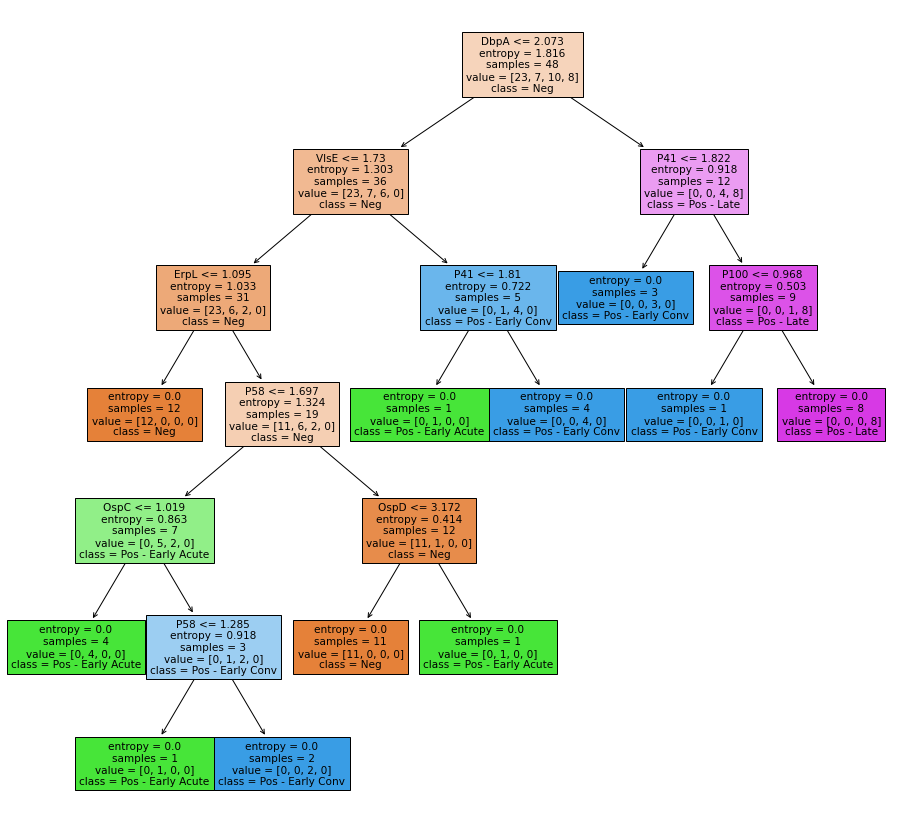

In [33]:
plt.rcParams['figure.figsize'] = [16.0 , 15.0]
#plt.rcParams['figure.dpi'] = 100
#tree.plot_tree(diagTree, filled=True, feature_names=('Hum IgG', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45',
tree.plot_tree(diagTree, filled=True, feature_names=('P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45',
'P58', 'P66', 'VlsE', 'ErpL', 'OspD'), class_names=('Neg', 'Pos - Early Acute', 'Pos - Early Conv', 'Pos - Late'))
plt.show()


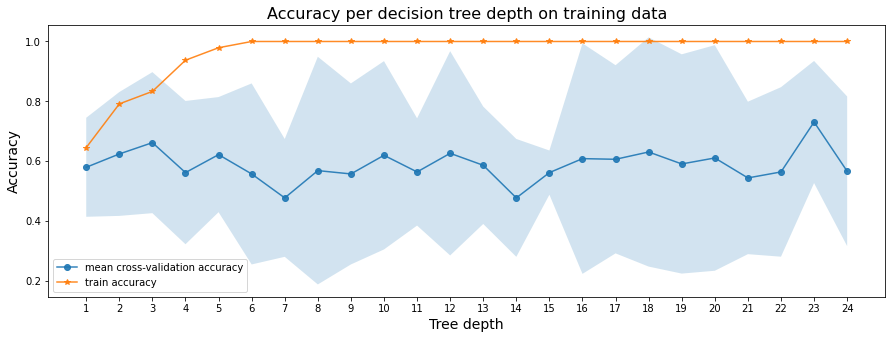

In [34]:
#following is code adapted from https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6
#Michel Kana, PhD

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
#FJD 20220502 changed from decTree criterion f default gini to entropy for smaller sample size
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [35]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-23 tree achieves the best mean cross-validation accuracy 73.11111 +/- 10.1932% on training dataset


Single tree depth:  23
Accuracy, Training Set:  100.0 %
Accuracy, Test Set:  43.75 %
['Pos - Early Conv' 'Neg' 'Pos - Early Conv' 'Pos - Early Conv' 'Neg'
 'Neg' 'Neg' 'Neg' 'Neg' 'Pos - Early Acute' 'Neg' 'Neg'
 'Pos - Early Conv' 'Neg' 'Neg' 'Neg']
52     Pos - Early Conv
58                  Neg
0            Pos - Late
44           Pos - Late
5     Pos - Early Acute
36    Pos - Early Acute
16                  Neg
12                  Neg
25                  Neg
61                  Neg
56                  Neg
9     Pos - Early Acute
40    Pos - Early Acute
13                  Neg
34    Pos - Early Acute
50     Pos - Early Conv
Name: Diag, dtype: object


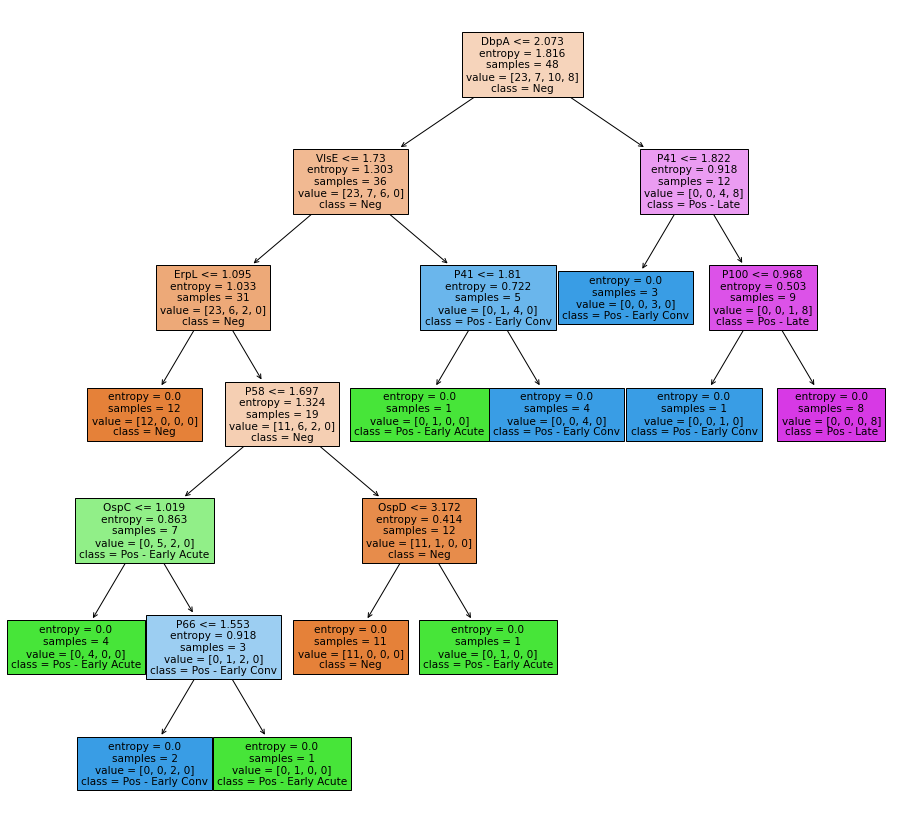

In [36]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(criterion="entropy",max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')

    return accuracy_train, accuracy_test, model
  

# train and evaluate a "best-depth" tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test, model = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)
print (model.predict(X_test))
print (y_test)
tree.plot_tree(model, filled=True, feature_names=('P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45',
       'P58', 'P66', 'VlsE', 'ErpL', 'OspD'), class_names=('Neg', 'Pos - Early Acute', 'Pos - Early Conv', 'Pos - Late'))
plt.show()